In [154]:
!pip install vizdoom

In [155]:
!cd github & git clone https://github.com/Farama-Foundation/ViZDoom

Cloning into 'ViZDoom'...
remote: Enumerating objects: 19226, done.
remote: Counting objects: 100% (2709/2709), done.
remote: Compressing objects: 100% (1023/1023), done.
remote: Total 19226 (delta 1901), reused 1769 (delta 1652), pack-reused 16517 (from 1)
Receiving objects: 100% (19226/19226), 59.18 MiB | 3.65 MiB/s, done.
Resolving deltas: 100% (12329/12329), done.


In [156]:
from vizdoom import *
import random as r
import time as t
import numpy as np

In [157]:
game = DoomGame()
game.load_config('github/ViZDoom/scenarios/basic.cfg')
game.init()

In [158]:
actions = np.identity(3,dtype=np.uint8)

In [159]:
episodes = 10
for episode in range(episodes):
    game.new_episode()
    while not game.is_episode_finished():
        state = game.get_state()
        img = state.screen_buffer
        info = state.game_variables
        reward = game.make_action(r.choice(actions),4)
        print("State #", state.number, "Reward:", reward, "Action:", actions)
        t.sleep(0.02)
    print("Episode finished! Total reward:", game.get_total_reward())
    t.sleep(2)
    # game.close()

State # 1 Reward: -4.0 Action: [[1 0 0]
 [0 1 0]
 [0 0 1]]
State # 2 Reward: -9.0 Action: [[1 0 0]
 [0 1 0]
 [0 0 1]]
State # 3 Reward: -4.0 Action: [[1 0 0]
 [0 1 0]
 [0 0 1]]
State # 4 Reward: -4.0 Action: [[1 0 0]
 [0 1 0]
 [0 0 1]]
State # 5 Reward: -4.0 Action: [[1 0 0]
 [0 1 0]
 [0 0 1]]
State # 6 Reward: -9.0 Action: [[1 0 0]
 [0 1 0]
 [0 0 1]]
State # 7 Reward: -4.0 Action: [[1 0 0]
 [0 1 0]
 [0 0 1]]
State # 8 Reward: -4.0 Action: [[1 0 0]
 [0 1 0]
 [0 0 1]]
State # 9 Reward: -4.0 Action: [[1 0 0]
 [0 1 0]
 [0 0 1]]
State # 10 Reward: -4.0 Action: [[1 0 0]
 [0 1 0]
 [0 0 1]]
State # 11 Reward: -4.0 Action: [[1 0 0]
 [0 1 0]
 [0 0 1]]
State # 12 Reward: -4.0 Action: [[1 0 0]
 [0 1 0]
 [0 0 1]]
State # 13 Reward: -4.0 Action: [[1 0 0]
 [0 1 0]
 [0 0 1]]
State # 14 Reward: -9.0 Action: [[1 0 0]
 [0 1 0]
 [0 0 1]]
State # 15 Reward: -4.0 Action: [[1 0 0]
 [0 1 0]
 [0 0 1]]
State # 16 Reward: -4.0 Action: [[1 0 0]
 [0 1 0]
 [0 0 1]]
State # 17 Reward: 97.0 Action: [[1 0 0]
 [0 1 0]

In [160]:
game.close()

In [192]:
!pip install gym

In [162]:
!pip install opencv-python gym vizdoom

In [163]:
!cd github & git clone https://github.com/Farama-Foundation/ViZDoom

fatal: destination path 'ViZDoom' already exists and is not an empty directory.


In [211]:
!pip install gym

  Using cached gym-0.26.2-py3-none-any.whl


In [233]:
from vizdoom import *
import random as r
import time as t
import numpy as np
from gymnasium import Env
from gymnasium.spaces import Box, Discrete
import cv2

In [265]:
from gymnasium import Env
from gymnasium.spaces import Discrete, Box
import numpy as np
import cv2
from vizdoom import DoomGame

class VizDoomEnv(Env):
    def __init__(self, render=False):
        super().__init__()
        self.game = DoomGame()
        self.game.load_config("github/ViZDoom/scenarios/basic.cfg")
        self.game.set_window_visible(render)
        self.game.init()

        self.observation_space = Box(low=0, high=255, shape=(100, 160, 1), dtype=np.uint8)
        self.action_space = Discrete(3)

    def step(self, action):
        actions = np.identity(3)
        reward = self.game.make_action(actions[action], 4)
        done = self.game.is_episode_finished()

        if self.game.get_state():
            state = self.grayscale(self.game.get_state().screen_buffer)
            ammo = self.game.get_state().game_variables[0]
            info = {"ammo": ammo}
        else:
            state = np.zeros(self.observation_space.shape)
            info = {"ammo": 0}

        return state, reward, done, False, info 

    def reset(self, *, seed=None, options=None):
        super().reset(seed=seed)
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state), {}

    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (160, 100), interpolation=cv2.INTER_CUBIC)
        return np.reshape(resized, (100, 160, 1))

    def render(self):
        pass

    def close(self):
        self.game.close()


In [266]:
env= VizDoomEnv(render=True)
# print("Observation space:", env.observation_space.sample().shape)

In [267]:
state = env.reset()

In [248]:
# env.close()

In [268]:
from stable_baselines3.common import env_checker

In [270]:
env.close()

In [269]:
env_checker.check_env(env)

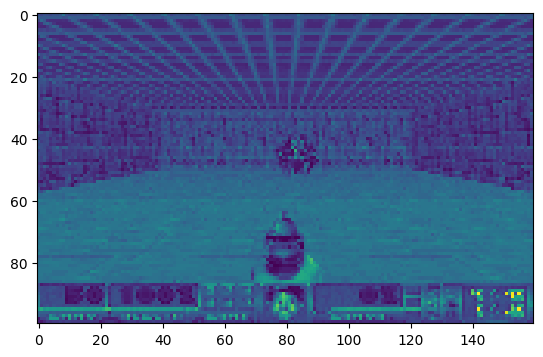

In [168]:
from matplotlib import pyplot as plt
plt.imshow(state)

In [169]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [170]:
!pip install stable-baselines3[extra]

In [271]:
#for saving models
import os
from stable_baselines3.common.callbacks import BaseCallback

In [272]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)
        return True

In [273]:
CHECKPOINT_DIR = './train/train_basic'
LOG_DIR = './logs/log_basic'

In [274]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [275]:
from stable_baselines3 import PPO
env = VizDoomEnv()

In [279]:
model = PPO("CnnPolicy", env, verbose=1, tensorboard_log=LOG_DIR , learning_rate=0.0001, n_steps=2048)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [280]:
model.learn(total_timesteps=100000, callback=callback)

Logging to ./logs/log_basic/PPO_2


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 37.9     |
|    ep_rew_mean     | -116     |
| time/              |          |
|    fps             | 239      |
|    iterations      | 1        |
|    time_elapsed    | 8        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 39.8        |
|    ep_rew_mean          | -127        |
| time/                   |             |
|    fps                  | 82          |
|    iterations           | 2           |
|    time_elapsed         | 49          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.006131846 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0.00024     |
|    learning_rate        | 0.

In [337]:
from stable_baselines3.common.evaluation import evaluate_policy

In [299]:
model= PPO.load('./train/train_basic/best_model_200000')

In [342]:
env = VizDoomEnv(render=True)

In [339]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100)

In [334]:
mean_reward

np.float64(79.2)

In [343]:
for episode in range(10):
    obs, info = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, truncated, info = env.step(action)
        t.sleep(0.5)
        total_reward += reward
    print(f"Episode: {episode}, Action: {action}, Reward: {reward}, Info: {info}")
    t.sleep(2)

Episode: 0, Action: 2, Reward: 99.0, Info: {'ammo': 0}
Episode: 1, Action: 2, Reward: 99.0, Info: {'ammo': 0}
Episode: 2, Action: 2, Reward: 99.0, Info: {'ammo': 0}
Episode: 3, Action: 2, Reward: 99.0, Info: {'ammo': 0}
Episode: 4, Action: 2, Reward: 99.0, Info: {'ammo': 0}
Episode: 5, Action: 2, Reward: 99.0, Info: {'ammo': 0}
Episode: 6, Action: 2, Reward: 99.0, Info: {'ammo': 0}
Episode: 7, Action: 2, Reward: 99.0, Info: {'ammo': 0}
Episode: 8, Action: 2, Reward: 99.0, Info: {'ammo': 0}
Episode: 9, Action: 2, Reward: 99.0, Info: {'ammo': 0}


In [344]:
env.close()